In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

%matplotlib inline

In [11]:
class LDA:
    
    def __init__(self, n_components = 2):
        self.n_components = n_components
        self.linear_discriminants = None
        
    def fit(self, X, y):
        n_samples, n_features = X.shape
        class_labels = np.unique(y)
        
        mean_overall = np.mean(X, axis=0)
        S_W = np.zeros((n_features, n_features))
        S_B = np.zeros((n_features, n_features))
        
        for c in class_labels:
            X_c = X[ y == c ]
            mu_c = np.mean(X_c, axis=0)
            S_i = X_c - mu_c
            S_W += S_i.T.dot(S_i)
            
            n_c = X_c.shape[0]
            mean_diff = (mu_c - mean_overall).reshape(n_features, 1)
            S_B += n_c * mean_diff.dot(mean_diff.T)
        
        S_X = np.linalg.inv(S_W).dot(S_B)
        eigen_values, eigen_vectors = np.linalg.eig(S_X)
        eigen_vectors = eigen_vectors.T
        sorted_idx = np.argsort(abs(eigen_values))[::-1]
        eigen_values = eigen_values[sorted_idx]
        eigen_vectors = eigen_vectors[sorted_idx]
    
        self.linear_discriminants = eigen_vectors[0 : self.n_components]

    def transform(self, X):
        return np.dot(X, self.linear_discriminants.T)

In [12]:
iris = datasets.load_iris()
X, y = iris.data, iris.target

In [13]:
lda = LDA(n_components = 2)
lda.fit(X, y)
X_transformed = lda.transform(X)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.20, random_state=10)

In [15]:
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

y_train_pred = LogReg.predict(X_train)
y_test_pred = LogReg.predict(X_test)

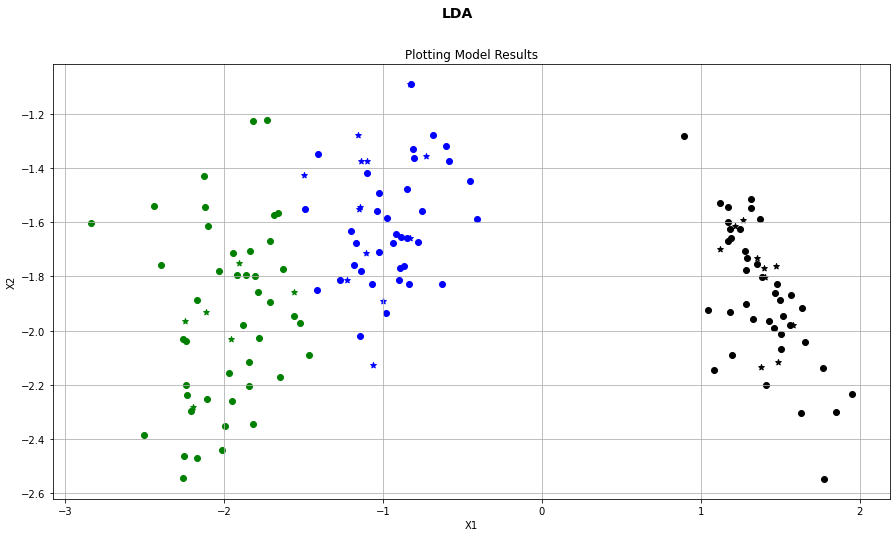

In [16]:
color = ['k', 'b', 'g', 'r', 'y', 'c', 'm', '#eeefff']
fig, ax = plt.subplots(figsize=(15, 8))
fig.suptitle("LDA", fontsize=14, fontweight="bold")
ax.set_title("Plotting Model Results")
ax.set_xlabel("X1")
ax.set_ylabel("X2")
plt.grid(True)
for idx in range(0, len(y_train_pred)):
    plt.scatter(x = X_train[idx][0], y = X_train[idx][1], color = color[y_train_pred[idx]])
for idx in range(0, len(y_test_pred)):
    plt.scatter(x = X_test[idx][0], y = X_test[idx][1], marker = "*" , color = color[y_test_pred[idx]])
    
plt.show()

In [17]:
from sklearn.metrics import accuracy_score

print("The training accuracy is : ", accuracy_score(y_train, y_train_pred))
print("The testing accuracy is : ", accuracy_score(y_test, y_test_pred))

The training accuracy is :  0.975
The testing accuracy is :  1.0
